In [2]:
# data preprocessing and look up how many words are there in every sentances
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
from pandas import DataFrame
path = r'D:\v-yanx\masijia\text_mood_classification\text_mood_classification\public_data\labeledTrainData.tsv'


In [24]:
sentiments = []
sentances = []
with open(path, encoding="utf8") as tsvfile:
    data = csv.reader(tsvfile, delimiter="\t")
    for line in data:
        sentiments.append(line[1])
        sentances.append(line[2])

In [49]:
len(sentances)

24501

In [36]:
t = sentances[1]
text = ''.join([c if c.isalpha() else ' ' for c in t])# clear ,#*&!@$...., only leave alphas

In [37]:
text

'This has to be the funniest stand up comedy I have ever seen  Eddie Izzard is a genius  he picks in Brits  Americans and everyone in between  His style is completely natural and completely hilarious  I doubt that anyone could sit through this and not laugh their a   off  Watch  enjoy  it s funny '

In [40]:
word = [w for w in text.split(' ') if w]

In [59]:
words_dic = {}
for i in range(1,len(sentances)):
    text = ''.join([c if c.isalpha() else ' ' for c in sentances[i]])
    words = [w for w in text.split(' ') if w]
    key = '{:0>5}_{}'.format(i,sentiments[i])
    words_dic[key] = words

In [55]:
np.save('words_dic.npy',words_dic)# save the sentances and their ids in a dictionary

In [20]:
words_dic_train = np.load('words_dic.npy',allow_pickle=True).item()

In [21]:
lens = []
for key in words_dic_train:
    l = len(words_dic_train[key])
    lens.append(l)
    

In [22]:
uni = set(lens)
x = []
y = []
for i in uni:
    x.append(i)
x.sort()
#y.append(lens.count(i))


In [23]:
for i in x:
    y.append(lens.count(i))

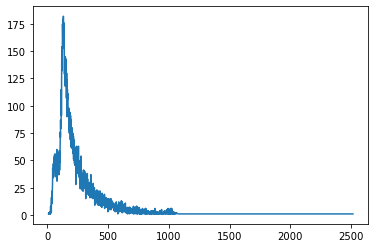

In [24]:
plt.figure('train')
plt.plot(x,y)
plt.savefig("train_distribution.jpg")



In [25]:
n_1000 = 0
n_500 = 0
n_250 = 0
n = 0
for i,case in enumerate(x):
    if case<=250:
        n_250 = n_250 + y[i]
    if case<=500:
        n_500 = n_500 + y[i]
    if case<=1000:
        n_1000 = n_1000 + y[i]
    n = n + y[i]
print('250_percent:',n_250/n)
print('500_percent:',n_500/n)
print('1000_percent:',n_1000/n)# from these percents, we choose 500 as our MAX_SEQUENCE_LENGTH

250_percent: 0.6830204081632653
500_percent: 0.9128979591836734
1000_percent: 0.9941632653061224


In [1]:
path_test = r'D:\v-yanx\masijia\text_mood_classification\text_mood_classification\public_data\testData.tsv'

In [3]:
ids = []
sentances = []
with open(path_test, encoding='utf8') as f:
    data = csv.reader(f,delimiter='\t')
    for line in data:
        ids.append(line[0])
        sentances.append(line[1])

In [4]:
sentances[1]

'So im not a big fan of Boll\'s work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he\'s not really staying true to the whole Carver agenda but we

In [5]:
words_dic1 = {}
for i in range(1,len(sentances)):
    text = ''.join([c if c.isalpha() else ' ' for c in sentances[i]])
    words = [w for w in text.split(' ') if w]
    key = '{:0>5}_{}'.format(i,ids[i])
    words_dic1[key] = words

In [6]:
np.save('test_words_dic.npy',words_dic1)

In [7]:
words_dic_test = np.load('test_words_dic.npy',allow_pickle=True).item()

In [13]:
test_lens = []
for key in words_dic_test:
    l = len(words_dic_test[key])
    test_lens.append(l)
    

In [18]:
len(test_lens)

48999

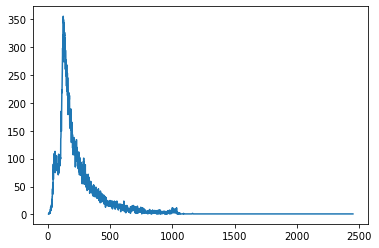

In [15]:
t_uni = set(test_lens)
t_x = []
t_y = []
for i in t_uni:
    t_x.append(i)
t_x.sort()
for i in t_x:
    t_y.append(test_lens.count(i))
plt.figure('test')
plt.plot(x,y)
plt.savefig("test_distribution.jpg")

In [17]:
t_n_1000 = 0
t_n_500 = 0
t_n_250 = 0
t_n = 0
for i,case in enumerate(t_x):
    if case<=250:
        t_n_250 = t_n_250 + t_y[i]
    if case<=500:
        t_n_500 = t_n_500 + t_y[i]
    if case<=1000:
        t_n_1000 = t_n_1000 + t_y[i]
    t_n = t_n + t_y[i]
print('250_percent:',t_n_250/t_n)
print('500_percent:',t_n_500/t_n)
print('1000_percent:',t_n_1000/t_n)
print('t_n:',t_n)

250_percent: 0.6789730402661279
500_percent: 0.9127737300761241
1000_percent: 0.9934692544745811
t_n: 48999
